In [1]:
from statistics import correlation

import kagglehub

# Download latest version
path = kagglehub.dataset_download("dylanjcastillo/7k-books-with-metadata")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\asusv\.cache\kagglehub\datasets\dylanjcastillo\7k-books-with-metadata\versions\3


In [2]:
import pandas as pd

In [3]:
books = pd.read_csv(f'{path}/books.csv')

In [4]:
books

isbn13      isbn10                      title  \
0     9780002005883  0002005883                     Gilead   
1     9780002261982  0002261987               Spider's Web   
2     9780006163831  0006163831               The One Tree   
3     9780006178736  0006178731             Rage of angels   
4     9780006280897  0006280897             The Four Loves   
...             ...         ...                        ...   
6805  9788185300535  8185300534                  I Am that   
6806  9788185944609  8185944601       Secrets Of The Heart   
6807  9788445074879  8445074873             Fahrenheit 451   
6808  9789027712059  9027712050   The Berlin Phenomenology   
6809  9789042003408  9042003405  'I'm Telling You Stories'   

                                            subtitle  \
0                                                NaN   
1                                            A Novel   
2                                                NaN   
3                                                NaN   
4                                                NaN   
...                                              ...   
6805             Talks with Sri Nisargadatta Maharaj   
6806                                             NaN   
6807                                             NaN   
6808                                             NaN   
6809  Jeanette Winterson and the Politics of Reading   

                                           authors  \
0                               Marilynne Robinson   
1                  Charles Osborne;Agatha Christie   
2                             Stephen R. Donaldson   
3                                   Sidney Sheldon   
4                              Clive Staples Lewis   
...                                            ...   
6805  Sri Nisargadatta Maharaj;Sudhakar S. Dikshit   
6806                                 Khalil Gibran   
6807                                  Ray Bradbury   
6808                 Georg Wilhelm Friedrich Hegel   
6809                        Helena Grice;Tim Woods   

                         categories  \
0                           Fiction   
1     Detective and mystery stories   
2                  American fiction   
3                           Fiction   
4                    Christian life   
...                             ...   
6805                     Philosophy   
6806                      Mysticism   
6807                   Book burning   
6808                        History   
6809             Literary Criticism   

                                              thumbnail  \
0     http://books.google.com/books/content?id=KQZCP...   
1     http://books.google.com/books/content?id=gA5GP...   
2     http://books.google.com/books/content?id=OmQaw...   
3     http://books.google.com/books/content?id=FKo2T...   
4     http://books.google.com/books/content?id=XhQ5X...   
...                                                 ...   
6805  http://books.google.com/books/content?id=Fv_JP...   
6806  http://books.google.com/books/content?id=XcrVp...   
6807                                                NaN   
6808  http://books.google.com/books/content?id=Vy7Sk...   
6809  http://books.google.com/books/content?id=2lVyR...   

                                            description  published_year  \
0     A NOVEL THAT READERS and critics have been eag...          2004.0   
1     A new 'Christie for Christmas' -- a full-lengt...          2000.0   
2     Volume Two of Stephen Donaldson's acclaimed se...          1982.0   
3     A memorable, mesmerizing heroine Jennifer -- b...          1993.0   
4     Lewis' work on the nature of love divides love...          2002.0   
...                                                 ...             ...   
6805  This collection of the timeless teachings of o...          1999.0   
6806                                                NaN          1993.0   
6807                                                NaN          2004.0   
6808  Since the th

In [5]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6810 entries, 0 to 6809
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   isbn13          6810 non-null   int64  
 1   isbn10          6810 non-null   object 
 2   title           6810 non-null   object 
 3   subtitle        2381 non-null   object 
 4   authors         6738 non-null   object 
 5   categories      6711 non-null   object 
 6   thumbnail       6481 non-null   object 
 7   description     6548 non-null   object 
 8   published_year  6804 non-null   float64
 9   average_rating  6767 non-null   float64
 10  num_pages       6767 non-null   float64
 11  ratings_count   6767 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 638.6+ KB


In [6]:
#function that can be reuse every time a modified df is made

def count_summary (df):
    summary = pd.DataFrame({
        'total' : [df.shape[0]]*df.shape[1],
        'non-null count' : df.count(),
        'unique count' : df.nunique(),
        'missing-count' : df.isnull().sum(),
        'missing-percent' : df.isnull().sum() / df.shape[0] * 100
    })
    return summary.sort_values('missing-percent', ascending=False)

In [7]:
count_summary(books)

total  non-null count  unique count  missing-count  \
subtitle         6810            2381          2009           4429   
thumbnail        6810            6481          6481            329   
description      6810            6548          6474            262   
categories       6810            6711           567             99   
authors          6810            6738          3780             72   
average_rating   6810            6767           200             43   
ratings_count    6810            6767          3881             43   
num_pages        6810            6767           915             43   
published_year   6810            6804            94              6   
title            6810            6810          6398              0   
isbn13           6810            6810          6810              0   
isbn10           6810            6810          6810              0   

                missing-percent  
subtitle              65.036711  
thumbnail              4.831131  
description            3.847283  
categories             1.453744  
authors                1.057269  
average_rating         0.631424  
ratings_count          0.631424  
num_pages              0.631424  
published_year         0.088106  
title                  0.000000  
isbn13                 0.000000  
isbn10                 0.000000

In [8]:
#this one is if we dont make a function

summary = pd.DataFrame({
    'total' : books.shape[0],
    'non-null count' : books.count(),
    'unique-count' : books.nunique(),
    'missing-count' : books.isnull().sum(),
    'missing-percent' : books.isnull().sum() / books.shape[0] * 100,
})

summary = summary.sort_values('missing-percent', ascending=False)
summary

total  non-null count  unique-count  missing-count  \
subtitle         6810            2381          2009           4429   
thumbnail        6810            6481          6481            329   
description      6810            6548          6474            262   
categories       6810            6711           567             99   
authors          6810            6738          3780             72   
average_rating   6810            6767           200             43   
ratings_count    6810            6767          3881             43   
num_pages        6810            6767           915             43   
published_year   6810            6804            94              6   
title            6810            6810          6398              0   
isbn13           6810            6810          6810              0   
isbn10           6810            6810          6810              0   

                missing-percent  
subtitle              65.036711  
thumbnail              4.831131  
description            3.847283  
categories             1.453744  
authors                1.057269  
average_rating         0.631424  
ratings_count          0.631424  
num_pages              0.631424  
published_year         0.088106  
title                  0.000000  
isbn13                 0.000000  
isbn10                 0.000000

* there are 6810 books,
* all isbn are distinct, no need for duplication
* subtitle has a lot of missing value, making it quite useless, think of a way to fix and use this
* in categories, there are many distinct observations, and if we look at the collumns, there are many useless categories, so we need to clean this and standardize it to make it usefull, because it has potental to be part of our recomender and having hundreds of categories is not practical
* in description, we have 3.8 % of missing value which is still good, but deeper investigation is needed to ensure that this missingness is not biased in someway

it is important to check if missing value have a pattern because it may indicate some sort of bias if missing values are linked to particular charactheristic about like the books in the dataset, to do investigation, can be from missingness heatmap

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

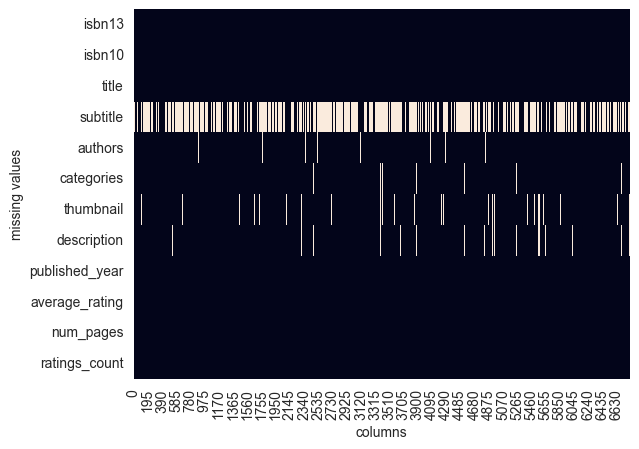

In [9]:
ax = plt.axes()
sns.heatmap(books.isna().transpose(), cbar=False, ax=ax )

plt.xlabel("columns")
plt.ylabel("missing values")
plt.show()

* subtitle has a lot of missing values
* categories, thumbnail, and description mostly have missing data that are random
* average rating, num pages, and rating count shows a clear pattern (observation that have one of them missing have all of them missing), to explain this, maybe these are from another dataset and that dataset doesn't contain all of the books in bigger dataset. this maybe potentialy a source of bias because the books that are missing perhaps newer, or have other charactheristic, or have better/worst rating, which will be check next
* the last thing, is to look at the missing of description, as this part is the core for all natural language processing, if there is any bias, we need to get rid of them and we need to know wether our book reccomender will then skew towards certain types of book

so we have a year of published, number of pages and average rating, we can use this to deduce things like our books that have missing description more likely to be older or shorter

In [10]:
import numpy as np
# make the missing info with numeric
books["missing_description"] = np.where(books["description"].isna(),1,0) #if missing put 1, if not put 0

#now make year of the book into age of the book
books["age_of_book"] = 2024 - books["published_year"]

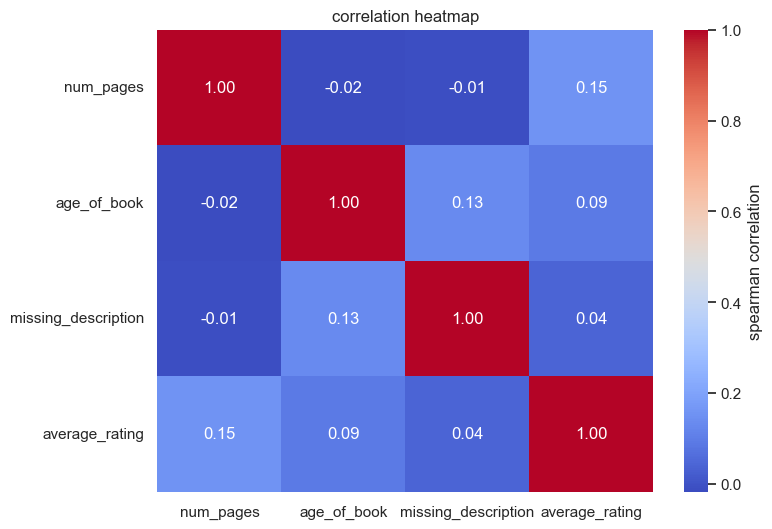

In [11]:
#create a list with just a subset of columns that we want
column_of_interest = ["num_pages", "age_of_book", "missing_description", "average_rating"]

#to check the corr, use spearman
#pearson for continous variables
#because the missing description is binary (1 and 0) we use spearman
correlation_matrix = books[column_of_interest].corr(method='spearman')

sns.set_theme(style="white")
plt.figure(figsize=(8,6))
heatmap = sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm",
                      cbar_kws={"label": "spearman correlation"})
heatmap.set_title("correlation heatmap")
plt.show()

from this values, the correlation of missing description with num_pages, age_of_book, and average rating is not really strong
* closer to 1 or -1 = strong correlation
* closer to 0 = weak correlation
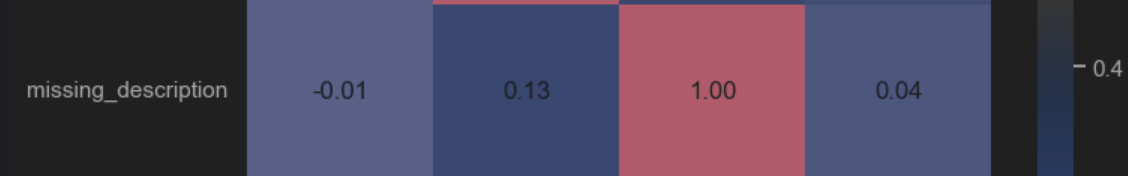

what we are interested in, is the "missing_descrription" correlation with the other variable, we want to know wether any of these variables have high correlation with missing description. The reason why we wanna know this is say number of pages is correlated with missing description ; it would indicate either longer books or shorter books had a missing description and we are not going to use book that has a missing description, it means our recomender maybe biased towards shorter book or longer book, same with age of book and average rating

In [12]:
#seems there is no pattern of missingness and
#replacing this description is going to be complex that probably involves web scraping to retrieve actual description,
# it is likely safe for us to delete missing values

#now check those book who have missing description
books[(books["description"].isna()) |
      (books["num_pages"].isna()) |
      (books["average_rating"].isna()) |
      (books["published_year"].isna())
]

isbn13      isbn10  \
37    9780006906018  000690601X   
60    9780007127740  000712774X   
99    9780020442806  0020442807   
102   9780023513206  0023513209   
105   9780026995016  0026995018   
...             ...         ...   
6787  9783464371640  3464371646   
6788  9783540292128  3540292128   
6798  9787506435673  7506435675   
6806  9788185944609  8185944601   
6807  9788445074879  8445074873   

                                                  title  \
37                    The Princess of the Chalet School   
60                                  The illustrated man   
99    The Chronicles of Narnia: Lion, the witch and ...   
102                                   Reason in History   
105                                             Spandau   
...                                                 ...   
6787                                        About a Boy   
6788             Enzyme-Catalyzed Synthesis of Polymers   
6798                                         Good Fight   
6806                               Secrets Of The Heart   
6807                                     Fahrenheit 451   

                                               subtitle  \
37                                                  NaN   
60                                                  NaN   
99                                                  NaN   
102   A General Introduction to the Philosophy of Hi...   
105                                  The Secret Diaries   
...                                                 ...   
6787                                                NaN   
6788                                                NaN   
6798                                                NaN   
6806                                                NaN   
6807                                                NaN   

                                         authors        categories  \
37                        Elinor Mary Brent-Dyer  Juvenile Fiction   
60                                  Ray Bradbury           Fiction   
99                           Clive Staples Lewis       Fairy tales   
102                Georg Wilhelm Friedrich Hegel        Philosophy   
105                                 Albert Speer           History   
...                                          ...               ...   
6787                                 Nick Hornby               NaN   
6788  Shiro Kobayashi;Helmut Ritter;David Kaplan           Science   
6798                   Judd Winick;Matthew Clark  Juvenile Fiction   
6806                               Khalil Gibran         Mysticism   
6807                                Ray Bradbury      Book burning   

                                              thumbnail  \
37    http://books.google.com/books/content?id=EJcQP...   
60    http://books.google.com/books/content?id=kePql...   
99                                                  NaN   
102   http://books.google.com/books/content?id=BCvcY...   
105                                                 NaN   
...                                                 ...   
6787  http://books.google.com/books/content?id=PuDYw...   
6788  http://books.google.com/books/content?id=WXOym...   
6798  http://books.google.com/books/content?id=xGPZA...   
6806  http://books.google.com/books/content?id=XcrVp...   
6807                                                NaN   

                                            description  published_year  \
37                                                  NaN          2000.0   
60                                                  NaN          2002.0   
99                                                  NaN          1978.0   
102                                                 NaN          1953.0   
105                                                 NaN          1976.0   
...                                                 ...             ...   
6787                                                NaN          2002.0   
6788                    

there are 303 rows, basically under 5% so we can get rid of this

In [13]:
#the same process as previous, but it reverse, we exclude the missing values
books_missing = books[~(books["description"].isna()) &
      (~books["num_pages"].isna()) &
      (~books["average_rating"].isna()) &
      (~books["published_year"].isna())
]

In [14]:
books_missing

isbn13      isbn10  \
0     9780002005883  0002005883   
1     9780002261982  0002261987   
2     9780006163831  0006163831   
3     9780006178736  0006178731   
4     9780006280897  0006280897   
...             ...         ...   
6803  9788173031014  8173031010   
6804  9788179921623  817992162X   
6805  9788185300535  8185300534   
6808  9789027712059  9027712050   
6809  9789042003408  9042003405   

                                                  title  \
0                                                Gilead   
1                                          Spider's Web   
2                                          The One Tree   
3                                        Rage of angels   
4                                        The Four Loves   
...                                                 ...   
6803                                Journey to the East   
6804  The Monk Who Sold His Ferrari: A Fable About F...   
6805                                          I Am that   
6808                           The Berlin Phenomenology   
6809                          'I'm Telling You Stories'   

                                            subtitle  \
0                                                NaN   
1                                            A Novel   
2                                                NaN   
3                                                NaN   
4                                                NaN   
...                                              ...   
6803                                             NaN   
6804                                             NaN   
6805             Talks with Sri Nisargadatta Maharaj   
6808                                             NaN   
6809  Jeanette Winterson and the Politics of Reading   

                                           authors  \
0                               Marilynne Robinson   
1                  Charles Osborne;Agatha Christie   
2                             Stephen R. Donaldson   
3                                   Sidney Sheldon   
4                              Clive Staples Lewis   
...                                            ...   
6803                                 Hermann Hesse   
6804                                  Robin Sharma   
6805  Sri Nisargadatta Maharaj;Sudhakar S. Dikshit   
6808                 Georg Wilhelm Friedrich Hegel   
6809                        Helena Grice;Tim Woods   

                         categories  \
0                           Fiction   
1     Detective and mystery stories   
2                  American fiction   
3                           Fiction   
4                    Christian life   
...                             ...   
6803              Adventure stories   
6804               Health & Fitness   
6805                     Philosophy   
6808                        History   
6809             Literary Criticism   

                                              thumbnail  \
0     http://books.google.com/books/content?id=KQZCP...   
1     http://books.google.com/books/content?id=gA5GP...   
2     http://books.google.com/books/content?id=OmQaw...   
3     http://books.google.com/books/content?id=FKo2T...   
4     http://books.google.com/books/content?id=XhQ5X...   
...                                                 ...   
6803  http://books.google.com/books/content?id=rq6JP...   
6804  http://books.google.com/books/content?id=c_7mf...   
6805  http://books.google.com/books/content?id=Fv_JP...   
6808  http://books.google.com/books/content?id=Vy7Sk...   
6809  http://books.google.com/books/content?id=2lVyR...   

                                            description  published_year  \
0     A NOVEL THAT READERS and critics have been eag...          2004.0   
1     A new 'Christie for Christmas' -- a full-lengt...          2000.0   
2     Volume Two of Stephen Donaldson's acclaimed se...          1982.0   
3     A memorable, mesmerizing heroine Jennifer -- b...          1993.0   
4     Le

now about "categories", there is too many distinct values

In [16]:
summary2 = pd.DataFrame({
    'total' : books_missing.shape[0],
    'non-null count' : books_missing.count(),
    'unique-count' : books_missing.nunique(),
    'missing-count' : books_missing.isnull().sum(),
    'missing-percent' : books_missing.isnull().sum() / books_missing.shape[0] * 100,
})

summary2 = summary2.sort_values('missing-percent', ascending=False)
summary2

total  non-null count  unique-count  missing-count  \
subtitle              6507            2281          1915           4226   
thumbnail             6507            6293          6293            214   
authors               6507            6444          3629             63   
categories            6507            6474           531             33   
isbn10                6507            6507          6507              0   
isbn13                6507            6507          6507              0   
title                 6507            6507          6133              0   
description           6507            6507          6434              0   
published_year        6507            6507            89              0   
average_rating        6507            6507           198              0   
num_pages             6507            6507           890              0   
ratings_count         6507            6507          3826              0   
missing_description   6507            6507             1              0   
age_of_book           6507            6507            89              0   

                     missing-percent  
subtitle                   64.945443  
thumbnail                   3.288766  
authors                     0.968188  
categories                  0.507146  
isbn10                      0.000000  
isbn13                      0.000000  
title                       0.000000  
description                 0.000000  
published_year              0.000000  
average_rating              0.000000  
num_pages                   0.000000  
ratings_count               0.000000  
missing_description         0.000000  
age_of_book                 0.000000

In [15]:
count_summary(books_missing)

total  non-null count  unique count  missing-count  \
subtitle              6507            2281          1915           4226   
thumbnail             6507            6293          6293            214   
authors               6507            6444          3629             63   
categories            6507            6474           531             33   
isbn10                6507            6507          6507              0   
isbn13                6507            6507          6507              0   
title                 6507            6507          6133              0   
description           6507            6507          6434              0   
published_year        6507            6507            89              0   
average_rating        6507            6507           198              0   
num_pages             6507            6507           890              0   
ratings_count         6507            6507          3826              0   
missing_description   6507            6507             1              0   
age_of_book           6507            6507            89              0   

                     missing-percent  
subtitle                   64.945443  
thumbnail                   3.288766  
authors                     0.968188  
categories                  0.507146  
isbn10                      0.000000  
isbn13                      0.000000  
title                       0.000000  
description                 0.000000  
published_year              0.000000  
average_rating              0.000000  
num_pages                   0.000000  
ratings_count               0.000000  
missing_description         0.000000  
age_of_book                 0.000000

In [16]:
books_missing["categories"].head(20)

0                                 Fiction
1           Detective and mystery stories
2                        American fiction
3                                 Fiction
4                          Christian life
5                          Christian life
6                        Authors, English
7                            Africa, East
8     Hyland, Morn (Fictitious character)
9                       Adventure stories
10                      Adventure stories
11                       American fiction
12                                Fiction
13                     Arthurian romances
14                      Adventure stories
15                        Fantasy fiction
16                                    NaN
17                          English drama
18                           Country life
19                        English fiction
Name: categories, dtype: object

if we look at the categories, some of them are very specific and noone is going to use this as categories, such as "Hyland, Morn". Let's have a look at the distribution of categories

In [17]:
books_missing["categories"].value_counts().reset_index().sort_values("count", ascending=False)

categories  count
0                         Fiction   2523
1                Juvenile Fiction    534
2       Biography & Autobiography    391
3                         History    258
4              Literary Criticism    164
..                            ...    ...
526                       Courage      1
527   Otherland (Imaginary place)      1
528                       Animals      1
529  Children of divorced parents      1
530                Catholic women      1

[531 rows x 2 columns]

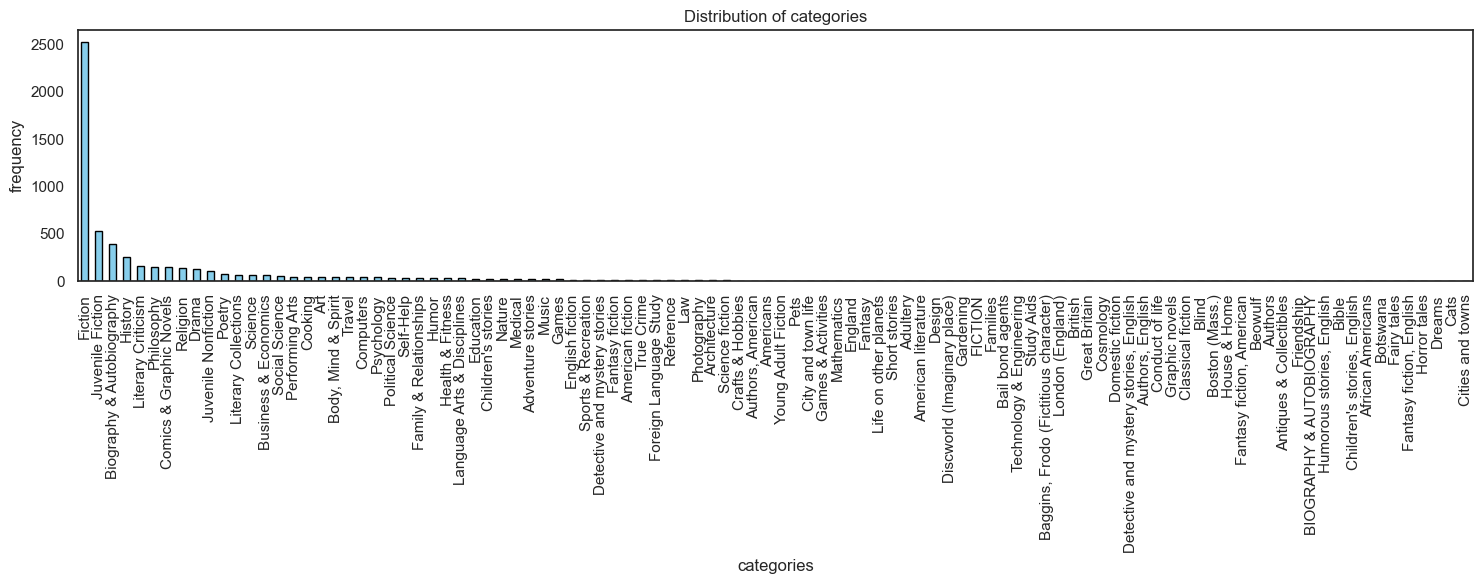

In [18]:
category_dist = books_missing["categories"].value_counts().sort_values(ascending=False)

top_n = 100
category_dist = category_dist.head(top_n)

plt.figure(figsize=(15,6))
category_dist.plot(kind="bar", color="skyblue", edgecolor="black")
plt.xticks(rotation=90)
plt.title("Distribution of categories")
plt.xlabel("categories")
plt.ylabel("frequency")
plt.tight_layout()
plt.show()

it can be seen how uneven the distribution is, this need to be normalized, let's see if we can do something by observing "description"

In [19]:
books_missing["description"].head(20)

0     A NOVEL THAT READERS and critics have been eag...
1     A new 'Christie for Christmas' -- a full-lengt...
2     Volume Two of Stephen Donaldson's acclaimed se...
3     A memorable, mesmerizing heroine Jennifer -- b...
4     Lewis' work on the nature of love divides love...
5     "In The Problem of Pain, C.S. Lewis, one of th...
6                                             Donation.
7     Until Vasco da Gama discovered the sea-route t...
8     A new-cover reissue of the fourth book in the ...
9     Kate Blackwell is an enigma and one of the mos...
10    One of Sidney Sheldon's most popular and bests...
11                                       Fantasy-roman.
12    Tricked once more by his wily half-brother, Ly...
13    An omnibus volume of the author's complete sto...
14    Available in the U.S. for the first time, this...
15    Jimmy the Hand, boy thief of Krondor, lived in...
16    Gareth is just a frightened young lad when he ...
17    Newly-Jacketed Edition Designed To Celebra

there is description that only consist of a very small information, like above there is "donation" and "fantasy-roman" which very short of information for a description. in LLM, description need to be meaningfull (contains enough information)

In [22]:
books_missing.loc[:, "words_in_description"] = books_missing["description"].str.split().str.len()

In [23]:
books_missing["words_in_description"].head(10)

0    199
1    205
2     14
3     57
4     45
5     75
6      1
7     80
8    160
9     30
Name: words_in_description, dtype: int64

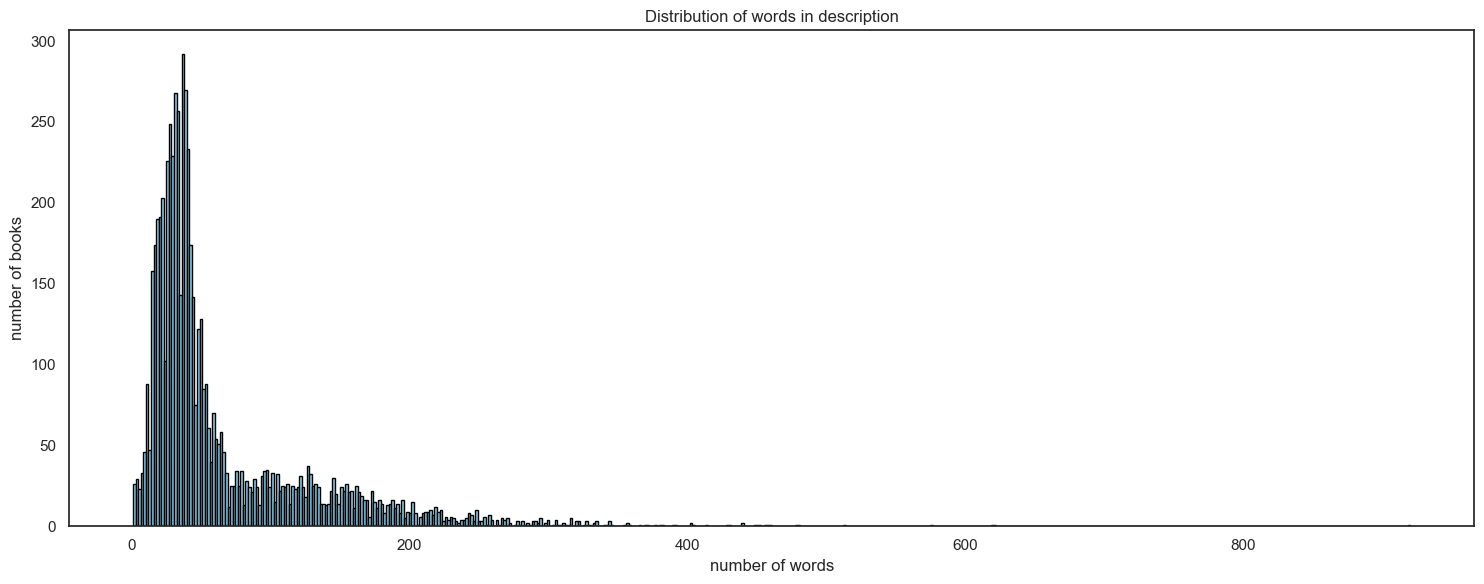

In [24]:
plt.figure(figsize=(15,6))
plt.hist(books_missing["words_in_description"].dropna(), bins=500, color="skyblue", edgecolor="black")
plt.title("Distribution of words in description")
plt.xlabel("number of words")
plt.ylabel("number of books")
plt.tight_layout()
plt.show()

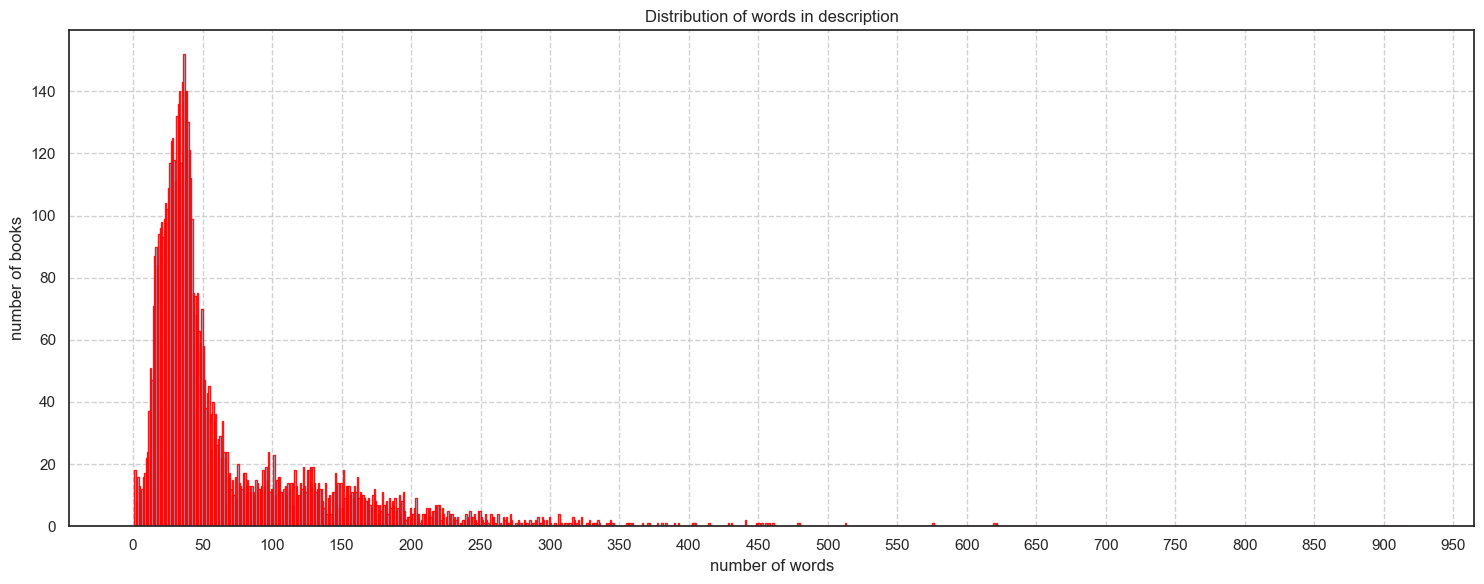

In [25]:
plt.figure(figsize=(15,6))
data = books_missing["words_in_description"].dropna()
plt.hist(data, bins=range(0, int(data.max())), color="skyblue", edgecolor="red", alpha=0.9)
plt.xticks(np.arange(0, data.max() + 50, 50))

plt.title("Distribution of words in description")
plt.xlabel("number of words")
plt.ylabel("number of books")
plt.grid(True, linestyle='--', alpha=0.9)
plt.tight_layout()
plt.show()

the number is around 10-300. but we need to come up with some cutoff to know how much words of description in order to be meaningful

In [26]:
books_missing.loc[books_missing["words_in_description"].between(1, 4), "description"]

6                                           Donation.
11                                     Fantasy-roman.
748              Includes bibliographical references.
770                             Bound For Oregon (PB)
775                                No Marketing Blurb
812                                No Marketing Blurb
857                          First published in 1813.
944                         Edited by Maurice Hindle.
953                        DEFOE/ROBINSON CRUSOE (BC)
954                             Edited by John Carey.
962                         ALLEN/GETTING THINGS DONE
1054                            GILBERT/EAT PRAY LOVE
1056    "Graham Greene centennial, 1904-2004"--Cover.
1060                   STEINBECK/GRAPES OF WRATH (BC)
1346                                   Fantasy-roman.
1546                                      Winter 2003
1610                                      Winter 1999
1813                             National bestseller.
1981                        

for this range, these are not very helpful, we can skip this

In [27]:
import textwrap

In [28]:
#this code is if we do looping to wrap the whole words of a sentences in the output
for i, desc in enumerate(books_missing.loc[books_missing["words_in_description"].between(15, 24), "description"], start=1):
    print(f"{i:>4}. {textwrap.fill(desc, width=100)}\n")


   1. One of Sidney Sheldon's most popular and bestselling titles, repackaged and reissued for a new
generation of fans.

   2. Tells the story of three generations of Chinese women, beginning at the turn of the century.

   3. A magical and fantastic collection of early stories by one of the most original children's authors
of the 20th century. For 8-11 year olds.

   4. A young drifter finds more than he bargained for when he agrees to deliver a parcel to an English
country house...

   5. A new 'The Doors of Perception' for the 21st century? A visionary journey from cynicism to shamanism
by a brilliant young US writer.

   6. A boy imagines what it would be like if he had such things as duck feet, a whale spout, and an
elephant's trunk.

   7. Tie your tongue in terrible knots as you try to read aloud. Nonsense rhyming story.

   8. An epic narrative that takes a look at slavery in all of its moral complexities.

   9. Depicts the inner-workings of the Hollywood movie industry and i

In [29]:
# this code is if there are many bins we want to check and instead of
# repeating the same loop/code, we just need to define a function

def print_descriptions_by_word_range(df, min_words, max_words, wrap_width=100):
    for i, desc in enumerate(df.loc[df["words_in_description"].between(min_words, max_words), "description"], start=1):
        print(f"{i:>4}. {textwrap.fill(desc, width=wrap_width)}\n")


In [30]:
# just put/delete the hashtag to check each of these

#print_descriptions_by_word_range(books_missing, 1, 4)
#print_descriptions_by_word_range(books_missing, 5, 14)
#print_descriptions_by_word_range(books_missing, 15, 24)
print_descriptions_by_word_range(books_missing, 25, 34)

   1. Kate Blackwell is an enigma and one of the most powerful women in the world. But at her ninetieth
birthday celebrations there are ghosts of absent friends and absent enemies.

   2. Available in the U.S. for the first time, this is the second volume in the exceptional Legends of
the Riftwar series from "New York Times"-bestselling authors Feist and Rosenberg.

   3. It is 1937, and Charles Ashworth, a Canon to the Archbishop of Canterbury, is sent to untangle a web
of self-delusion and corruption at the episcopal palace of the charismatic Bishop of Starbridge.

   4. Reissue of the author's most famous and well-loved work, the Starbridge series, six self-contained
yet interconnected novels that explore the history of the Church of England through the 20th
century.

   5. No one believes a little girl when she insists that she has witnessed a murder until she herself
turns up drowned, and Hercule Poirot sets out to catch the killer.

   6. When a dangerous necromancer threatens to

seems that using 25 as the cutoff is better

now let's do the filtering code to remove those below 25 words

In [31]:
books_missing_25_words = books_missing[books_missing["words_in_description"]>=25]

In [32]:
books_missing_25_words

isbn13      isbn10  \
0     9780002005883  0002005883   
1     9780002261982  0002261987   
3     9780006178736  0006178731   
4     9780006280897  0006280897   
5     9780006280934  0006280935   
...             ...         ...   
6802  9788172235222  8172235224   
6803  9788173031014  8173031010   
6804  9788179921623  817992162X   
6805  9788185300535  8185300534   
6808  9789027712059  9027712050   

                                                  title  \
0                                                Gilead   
1                                          Spider's Web   
3                                        Rage of angels   
4                                        The Four Loves   
5                                   The Problem of Pain   
...                                                 ...   
6802                                  Mistaken Identity   
6803                                Journey to the East   
6804  The Monk Who Sold His Ferrari: A Fable About F...   
6805                                          I Am that   
6808                           The Berlin Phenomenology   

                                 subtitle  \
0                                     NaN   
1                                 A Novel   
3                                     NaN   
4                                     NaN   
5                                     NaN   
...                                   ...   
6802                                  NaN   
6803                                  NaN   
6804                                  NaN   
6805  Talks with Sri Nisargadatta Maharaj   
6808                                  NaN   

                                           authors  \
0                               Marilynne Robinson   
1                  Charles Osborne;Agatha Christie   
3                                   Sidney Sheldon   
4                              Clive Staples Lewis   
5                              Clive Staples Lewis   
...                                            ...   
6802                              Nayantara Sahgal   
6803                                 Hermann Hesse   
6804                                  Robin Sharma   
6805  Sri Nisargadatta Maharaj;Sudhakar S. Dikshit   
6808                 Georg Wilhelm Friedrich Hegel   

                         categories  \
0                           Fiction   
1     Detective and mystery stories   
3                           Fiction   
4                    Christian life   
5                    Christian life   
...                             ...   
6802        Indic fiction (English)   
6803              Adventure stories   
6804               Health & Fitness   
6805                     Philosophy   
6808                        History   

                                              thumbnail  \
0     http://books.google.com/books/content?id=KQZCP...   
1     http://books.google.com/books/content?id=gA5GP...   
3     http://books.google.com/books/content?id=FKo2T...   
4     http://books.google.com/books/content?id=XhQ5X...   
5     http://books.google.com/books/content?id=Kk-uV...   
...                                                 ...   
6802  http://books.google.com/books/content?id=q-tKP...   
6803  http://books.google.com/books/content?id=rq6JP...   
6804  http://books.google.com/books/content?id=c_7mf...   
6805  http://books.google.com/books/content?id=Fv_JP...   
6808  http://books.google.com/books/content?id=Vy7Sk...   

                                            description  published_year  \
0     A NOVEL THAT READERS and critics have been eag...          2004.0   
1     A new 'Christie for Christmas' -- a full-lengt...          2000.0   
3     A memorable, mesmerizing heroine Jennifer -- b...          1993.0   
4     Lewis' work on the nature of love divides love...          2002.0   
5     "In The Problem of Pain, C.S. Lewis, one of th...          2002.0   
...                                                 ...          

now we have 5.2 k books after filtering

In [33]:
count_summary(books_missing_25_words)

total  non-null count  unique count  missing-count  \
subtitle               5197            1817          1519           3380   
thumbnail              5197            5031          5031            166   
authors                5197            5165          3045             32   
categories             5197            5167           479             30   
title                  5197            5197          4969              0   
isbn13                 5197            5197          5197              0   
isbn10                 5197            5197          5197              0   
description            5197            5197          5154              0   
published_year         5197            5197            83              0   
average_rating         5197            5197           190              0   
num_pages              5197            5197           808              0   
ratings_count          5197            5197          3242              0   
missing_description    5197            5197             1              0   
age_of_book            5197            5197            83              0   
words_in_description   5197            5197           320              0   

                      missing-percent  
subtitle                    65.037522  
thumbnail                    3.194150  
authors                      0.615740  
categories                   0.577256  
title                        0.000000  
isbn13                       0.000000  
isbn10                       0.000000  
description                  0.000000  
published_year               0.000000  
average_rating               0.000000  
num_pages                    0.000000  
ratings_count                0.000000  
missing_description          0.000000  
age_of_book                  0.000000  
words_in_description         0.000000

subtitle is having many missing values thus we said is it is unusable, but it is common to have books paired with title and subtitle, so what we can do is create a new column for pairing title and subtitle

In [35]:
books_missing_25_words.loc[:, "title_and_subtitle"] = (
    np.where(books_missing_25_words["subtitle"].isna(), books_missing_25_words["title"],
             books_missing_25_words[["title","subtitle"]].astype(str).agg(": ".join, axis=1))
)

In [36]:
for i, title_sub in enumerate(books_missing_25_words["title_and_subtitle"], start=1):
    print(f"{i:>4}. {textwrap.fill(title_sub, width=100)}\n")

   1. Gilead

   2. Spider's Web: A Novel

   3. Rage of angels

   4. The Four Loves

   5. The Problem of Pain

   6. Empires of the Monsoon: A History of the Indian Ocean and Its Invaders

   7. The Gap Into Madness: Chaos and Order

   8. Master of the Game

   9. Warhost of Vastmark

  10. The Once and Future King

  11. Murder in LaMut

  12. Jimmy the Hand

  13. Well of Darkness

  14. Witness for the Prosecution & Selected Plays

  15. The Little House

  16. Mystical Paths

  17. Glittering Images

  18. Glamorous Powers

  19. The Mad Ship

  20. Post Captain

  21. The Reverse of the Medal

  22. Miss Marple: The Complete Short Stories

  23. The Years of Rice and Salt

  24. Spares

  25. Gravity

  26. The Wise Woman

  27. Girls' Night in

  28. The White Album

  29. The Lexus and the Olive Tree

  30. 'Tis: A Memoir

  31. Ocean Star Express

  32. Tree and Leaf: The Homecoming of Beorhtnoth : Beorhthelm's Son

  33. Partners in Crime

  34. Murder in Mesopotamia

  35

In [37]:
count_summary(books_missing_25_words)

total  non-null count  unique count  missing-count  \
subtitle               5197            1817          1519           3380   
thumbnail              5197            5031          5031            166   
authors                5197            5165          3045             32   
categories             5197            5167           479             30   
title                  5197            5197          4969              0   
isbn10                 5197            5197          5197              0   
isbn13                 5197            5197          5197              0   
description            5197            5197          5154              0   
published_year         5197            5197            83              0   
average_rating         5197            5197           190              0   
num_pages              5197            5197           808              0   
ratings_count          5197            5197          3242              0   
missing_description    5197            5197             1              0   
age_of_book            5197            5197            83              0   
words_in_description   5197            5197           320              0   
title_and_subtitle     5197            5197          5056              0   

                      missing-percent  
subtitle                    65.037522  
thumbnail                    3.194150  
authors                      0.615740  
categories                   0.577256  
title                        0.000000  
isbn10                       0.000000  
isbn13                       0.000000  
description                  0.000000  
published_year               0.000000  
average_rating               0.000000  
num_pages                    0.000000  
ratings_count                0.000000  
missing_description          0.000000  
age_of_book                  0.000000  
words_in_description         0.000000  
title_and_subtitle           0.000000

now we want to create a new descriptiion collumn wthat tags each description with an identifier, this is important to bild vector database. we can useeither isbn columns because they are uniq identifier

what we can do is to attach the isbn 10 to the first line of description and making them in a new column

In [39]:
books_missing_25_words.loc[:, "tag_description"] = books_missing_25_words[["isbn10","description"]].astype(str).agg(" ".join, axis=1)

In [40]:
books_missing_25_words["tag_description"].head(10)

0     0002005883 A NOVEL THAT READERS and critics ha...
1     0002261987 A new 'Christie for Christmas' -- a...
3     0006178731 A memorable, mesmerizing heroine Je...
4     0006280897 Lewis' work on the nature of love d...
5     0006280935 "In The Problem of Pain, C.S. Lewis...
7     0006380832 Until Vasco da Gama discovered the ...
8     000647022X A new-cover reissue of the fourth b...
9     0006472613 Kate Blackwell is an enigma and one...
12    0006482074 Tricked once more by his wily half-...
13    0006483011 An omnibus volume of the author's c...
Name: tag_description, dtype: object

In [41]:
count_summary(books_missing_25_words)

total  non-null count  unique count  missing-count  \
subtitle               5197            1817          1519           3380   
thumbnail              5197            5031          5031            166   
authors                5197            5165          3045             32   
categories             5197            5167           479             30   
isbn13                 5197            5197          5197              0   
isbn10                 5197            5197          5197              0   
title                  5197            5197          4969              0   
description            5197            5197          5154              0   
published_year         5197            5197            83              0   
average_rating         5197            5197           190              0   
num_pages              5197            5197           808              0   
ratings_count          5197            5197          3242              0   
missing_description    5197            5197             1              0   
age_of_book            5197            5197            83              0   
words_in_description   5197            5197           320              0   
title_and_subtitle     5197            5197          5056              0   
tag_description        5197            5197          5197              0   

                      missing-percent  
subtitle                    65.037522  
thumbnail                    3.194150  
authors                      0.615740  
categories                   0.577256  
isbn13                       0.000000  
isbn10                       0.000000  
title                        0.000000  
description                  0.000000  
published_year               0.000000  
average_rating               0.000000  
num_pages                    0.000000  
ratings_count                0.000000  
missing_description          0.000000  
age_of_book                  0.000000  
words_in_description         0.000000  
title_and_subtitle           0.000000  
tag_description              0.000000

In [42]:
for i, tag_desc in enumerate(books_missing_25_words["tag_description"], start=1):
    print(f"{i:>4}. {textwrap.fill(tag_desc, width=100)}\n")

   1. 0002005883 A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead
is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a
preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa,
towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a
legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John
tells of the rift between his grandfather and his father: the elder, an angry visionary who fought
for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal
namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for
forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and
truth in the smallest of life’s details, Gilead is a song of celebration and acceptance of the best
and the wo

now we can drop collumn we added that we don't need before proceed to NLP

In [43]:
(
    books_missing_25_words
    .drop(["subtitle", "missing_description", "age_of_book", "words_in_description"], axis=1)
    .to_csv("books_clean2.csv", index=False)
)

the next thing is to turn the raw text data into a vector (WORD EMBEDDING), and bundle those vectors into a database, allowing us to find the most similar book to a query